**import data**

In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

**load data untuk di analsisi dan di clustert**

In [ ]:
csv_path = 'ad_nyc.csv'
df = pd.read_csv(csv_path)

total_tasks = len(df)
max_threads = 1

In [ ]:
df

,Fiscal Year,Ad Campaign Name,Agency,Org Ad Placed In (Agency submission),Org Ad Placed In (MOECM Standardized),Outlet Channel (Agency submission),Type of Media (MOECM),Language,Spend Amount,Vendor Name,Ad Placement Method,Quarter (MOECM),Ad Start Date,Ad End Date,Purpose
0,FY24,RCU Agency Attorney,ACS,City & State New York,City & State New York,Job Board,Other,English,44.78,GBSA Inc. Dba Graystone Group,Media Placement Vendor,1,07/14/2023,08/13/2023,Recruitment
1,FY24,RCU Agency Attorney,ACS,City & State New York,City & State New York,Job Board,Other,English,44.78,GBSA Inc. Dba Graystone Group,Media Placement Vendor,1,07/14/2023,08/13/2023,Recruitment
2,FY24,RCU Agency Attorney,ACS,City Limits,City Limits,Job Board,Other,English,44.78,GBSA Inc. Dba Graystone Group,Media Placement Vendor,1,07/14/2023,08/13/2023,Recruitment
3,FY24,RCU Agency Attorney,ACS,City Limits,City Limits,Job Board,Other,English,44.78,GBSA Inc. Dba Graystone Group,Media Placement Vendor,1,07/14/2023,08/13/2023,Recruitment
4,FY24,RCU Agency Attorney,ACS,Governmentjobs.com,Governmentjobs.com,Job Board,Other,English,44.78,GBSA Inc. Dba Graystone Group,Media Placement Vendor,1,07/14/2023,08/13/2023,Recruitment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18081,FY23,International Mobie,SBS,Weekly Awaz,Weekly Awaz,Newspaper (Digital),Digital,Urdu,1000.00,Venus Media,Placement Vendor,4,06/15/2023,06/30/2023,Other
18082,FY23,Shop Your City,SBS,Weekly Dunya International,Weekly Dunya International,Newspaper (Print),Print,Urdu,785.00,Miller,Placement Vendor,2,11/18/2022,12/09/2022,Other
18083,FY23,Small Business Opportunities,SBS,Weekly Dunya International,Weekly Dunya International,Newspaper (Print),Print,Urdu,785.00,Miller,Placement Vendor,3,02/10/2023,02/24/2023,Other
18084,FY23,Workforce1 Career Centers,SBS,Weekly Dunya International,Weekly Dunya International,Newspaper (Print),Print,Urdu,785.00,Miller,Placement Vendor,3,02/10/2023,03/03/2023,Other


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18086 entries, 0 to 18085
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Fiscal Year                            18086 non-null  object 
 1   Ad Campaign Name                       18082 non-null  object 
 2   Agency                                 18086 non-null  object 
 3   Org Ad Placed In (Agency submission)   18085 non-null  object 
 4   Org Ad Placed In (MOECM Standardized)  18085 non-null  object 
 5   Outlet Channel (Agency submission)     18086 non-null  object 
 6   Type of Media (MOECM)                  18086 non-null  object 
 7   Language                               17190 non-null  object 
 8   Spend Amount                           18071 non-null  float64
 9   Vendor Name                            18086 non-null  object 
 10  Ad Placement Method                    17769 non-null  object 
 11  Qu

**EDA AND CLEANING DATA**

In [ ]:
df.drop_duplicates()

,Fiscal Year,Ad Campaign Name,Agency,Org Ad Placed In (Agency submission),Org Ad Placed In (MOECM Standardized),Outlet Channel (Agency submission),Type of Media (MOECM),Language,Spend Amount,Vendor Name,Ad Placement Method,Quarter (MOECM),Ad Start Date,Ad End Date,Purpose
0,FY24,RCU Agency Attorney,ACS,City & State New York,City & State New York,Job Board,Other,English,44.78,GBSA Inc. Dba Graystone Group,Media Placement Vendor,1,07/14/2023,08/13/2023,Recruitment
2,FY24,RCU Agency Attorney,ACS,City Limits,City Limits,Job Board,Other,English,44.78,GBSA Inc. Dba Graystone Group,Media Placement Vendor,1,07/14/2023,08/13/2023,Recruitment
4,FY24,RCU Agency Attorney,ACS,Governmentjobs.com,Governmentjobs.com,Job Board,Other,English,44.78,GBSA Inc. Dba Graystone Group,Media Placement Vendor,1,07/14/2023,08/13/2023,Recruitment
6,FY24,RCU Agency Attorney,ACS,Idealist,Idealist,Job Board,Other,English,30.38,GBSA Inc. Dba Graystone Group,Media Placement Vendor,1,07/14/2023,08/13/2023,Recruitment
8,FY24,RCU Agency Attorney,ACS,Law Jobs,Law Jobs,Job Board,Other,English,156.38,GBSA Inc. Dba Graystone Group,Media Placement Vendor,1,07/14/2023,08/13/2023,Recruitment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18081,FY23,International Mobie,SBS,Weekly Awaz,Weekly Awaz,Newspaper (Digital),Digital,Urdu,1000.00,Venus Media,Placement Vendor,4,06/15/2023,06/30/2023,Other
18082,FY23,Shop Your City,SBS,Weekly Dunya International,Weekly Dunya International,Newspaper (Print),Print,Urdu,785.00,Miller,Placement Vendor,2,11/18/2022,12/09/2022,Other
18083,FY23,Small Business Opportunities,SBS,Weekly Dunya International,Weekly Dunya International,Newspaper (Print),Print,Urdu,785.00,Miller,Placement Vendor,3,02/10/2023,02/24/2023,Other
18084,FY23,Workforce1 Career Centers,SBS,Weekly Dunya International,Weekly Dunya International,Newspaper (Print),Print,Urdu,785.00,Miller,Placement Vendor,3,02/10/2023,03/03/2023,Other


In [ ]:
columns_to_keep = [
    'Spend Amount',
    'Ad Placement Method',
    'Type of Media (MOECM)',
    'Outlet Channel (Agency submission)',
    'Language',
    # 'Agency',
    'Purpose',
    'Ad Campaign Name',
    # 'Vendor Name'
]

df_filtered = df[columns_to_keep]

In [ ]:
df

,Fiscal Year,Ad Campaign Name,Agency,Org Ad Placed In (Agency submission),Org Ad Placed In (MOECM Standardized),Outlet Channel (Agency submission),Type of Media (MOECM),Language,Spend Amount,Vendor Name,Ad Placement Method,Quarter (MOECM),Ad Start Date,Ad End Date,Purpose
0,FY24,RCU Agency Attorney,ACS,City & State New York,City & State New York,Job Board,Other,English,44.78,GBSA Inc. Dba Graystone Group,Media Placement Vendor,1,07/14/2023,08/13/2023,Recruitment
1,FY24,RCU Agency Attorney,ACS,City & State New York,City & State New York,Job Board,Other,English,44.78,GBSA Inc. Dba Graystone Group,Media Placement Vendor,1,07/14/2023,08/13/2023,Recruitment
2,FY24,RCU Agency Attorney,ACS,City Limits,City Limits,Job Board,Other,English,44.78,GBSA Inc. Dba Graystone Group,Media Placement Vendor,1,07/14/2023,08/13/2023,Recruitment
3,FY24,RCU Agency Attorney,ACS,City Limits,City Limits,Job Board,Other,English,44.78,GBSA Inc. Dba Graystone Group,Media Placement Vendor,1,07/14/2023,08/13/2023,Recruitment
4,FY24,RCU Agency Attorney,ACS,Governmentjobs.com,Governmentjobs.com,Job Board,Other,English,44.78,GBSA Inc. Dba Graystone Group,Media Placement Vendor,1,07/14/2023,08/13/2023,Recruitment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18081,FY23,International Mobie,SBS,Weekly Awaz,Weekly Awaz,Newspaper (Digital),Digital,Urdu,1000.00,Venus Media,Placement Vendor,4,06/15/2023,06/30/2023,Other
18082,FY23,Shop Your City,SBS,Weekly Dunya International,Weekly Dunya International,Newspaper (Print),Print,Urdu,785.00,Miller,Placement Vendor,2,11/18/2022,12/09/2022,Other
18083,FY23,Small Business Opportunities,SBS,Weekly Dunya International,Weekly Dunya International,Newspaper (Print),Print,Urdu,785.00,Miller,Placement Vendor,3,02/10/2023,02/24/2023,Other
18084,FY23,Workforce1 Career Centers,SBS,Weekly Dunya International,Weekly Dunya International,Newspaper (Print),Print,Urdu,785.00,Miller,Placement Vendor,3,02/10/2023,03/03/2023,Other


In [ ]:
df = df_filtered

In [ ]:
print(f" Ad Campaign Name : {df['Ad Campaign Name'].unique()}")
# print(f"Agency  : {df['Agency'].unique()}")
print(f"Outlet Channel (Agency submission)  : {df['Outlet Channel (Agency submission)'].unique()}")
print(f"Type of Media (MOECM) : {df['Type of Media (MOECM)'].unique()}")
print(f"Language   : {df['Language'].unique()}")
print(f"Spend Amount  : {df['Spend Amount'].unique()}")
# print(f"Vendor Name : {df['Vendor Name'].unique()}")
print(f" Ad Placement Method : {df['Ad Placement Method'].unique()}")
print(f" Purpose : {df['Purpose'].unique()}")

 Ad Campaign Name : ['RCU Agency Attorney' 'Investigative Consultant - Level 1'
 'Investigative Consultant - Level 2' ... 'BE NYC' 'Cannabis Initiative'
 'Customized Training']
Outlet Channel (Agency submission)  : ['Job Board' 'Newspaper (Print)' 'Social Media' 'Programmatic'
 'Newspaper (Digital)' 'Radio Channel' 'Television Channel' 'Out of Home'
 'Webpage (Digital)' 'Digital Screens' 'Magazine (Print)'
 'Streaming Video' 'Streaming Radio' 'Radio Show' 'Newsletter (Print)'
 'Television' 'Newsletter (Digital)' 'Television Show/Program' 'Other'
 'Magazine (Digital)' 'Radio' 'TV' 'Newspaper' 'Digital'
 'Website (Digital)' 'Digital Out of Home' 'job board' 'Print'
 'Radio Chanel' 'Newspaper Digital' 'Radio Station' 'Journal (Print)'
 'Digital Media' 'Out of Home Advertisment']
Type of Media (MOECM) : ['Other' 'Print' 'Digital' 'Radio' 'TV' 'digital']
Language   : ['English' 'Spanish' 'Arabic' 'Bengali (Bangla)' 'Chinese (Traditional)'
 'Haitian Creole' 'Korean' 'Urdu' 'Polish' 'Bengali'

In [ ]:
df

,Spend Amount,Ad Placement Method,Type of Media (MOECM),Outlet Channel (Agency submission),Language,Purpose,Ad Campaign Name
0,44.78,Media Placement Vendor,Other,Job Board,English,Recruitment,RCU Agency Attorney
1,44.78,Media Placement Vendor,Other,Job Board,English,Recruitment,RCU Agency Attorney
2,44.78,Media Placement Vendor,Other,Job Board,English,Recruitment,RCU Agency Attorney
3,44.78,Media Placement Vendor,Other,Job Board,English,Recruitment,RCU Agency Attorney
4,44.78,Media Placement Vendor,Other,Job Board,English,Recruitment,RCU Agency Attorney
...,...,...,...,...,...,...,...
18081,1000.00,Placement Vendor,Digital,Newspaper (Digital),Urdu,Other,International Mobie
18082,785.00,Placement Vendor,Print,Newspaper (Print),Urdu,Other,Shop Your City
18083,785.00,Placement Vendor,Print,Newspaper (Print),Urdu,Other,Small Business Opportunities
18084,785.00,Placement Vendor,Print,Newspaper (Print),Urdu,Other,Workforce1 Career Centers


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualisasi_kolom(df, nama_kolom):
    # Check if column is string type, convert if needed
    if df[nama_kolom].dtype != 'object':
        df[nama_kolom] = df[nama_kolom].astype(str)


    df = df.explode(nama_kolom)
    top_n = 15
    Spend_Amount_counts = df[nama_kolom].value_counts().head(top_n).reset_index()
    Spend_Amount_counts.columns = [nama_kolom, 'Count']

    Spend_Amount_counts = Spend_Amount_counts.sort_values('Count', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")

    bar_plot = sns.barplot(
        x='Count',
        y=nama_kolom,
        data=Spend_Amount_counts,
        palette='viridis',
        alpha=0.7
    )

    for i, (value, name) in enumerate(zip(Spend_Amount_counts['Count'], Spend_Amount_counts[nama_kolom])):
        bar_plot.text(value + 0.5, i, f'{value}', ha='left', va='center', fontsize=10)

    plt.title(f'jumlah nilai unik dari data {nama_kolom}',
              fontsize=16, pad=20, fontweight='bold')
    plt.xlabel('Number of Titles', fontsize=12)
    plt.ylabel(nama_kolom, fontsize=12)
    plt.xlim(0, Spend_Amount_counts['Count'].max() * 1.1)
    sns.despine(left=True, bottom=True)

    plt.tight_layout()
    plt.show()

<ipython-input-11-35ec5bd161f2>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


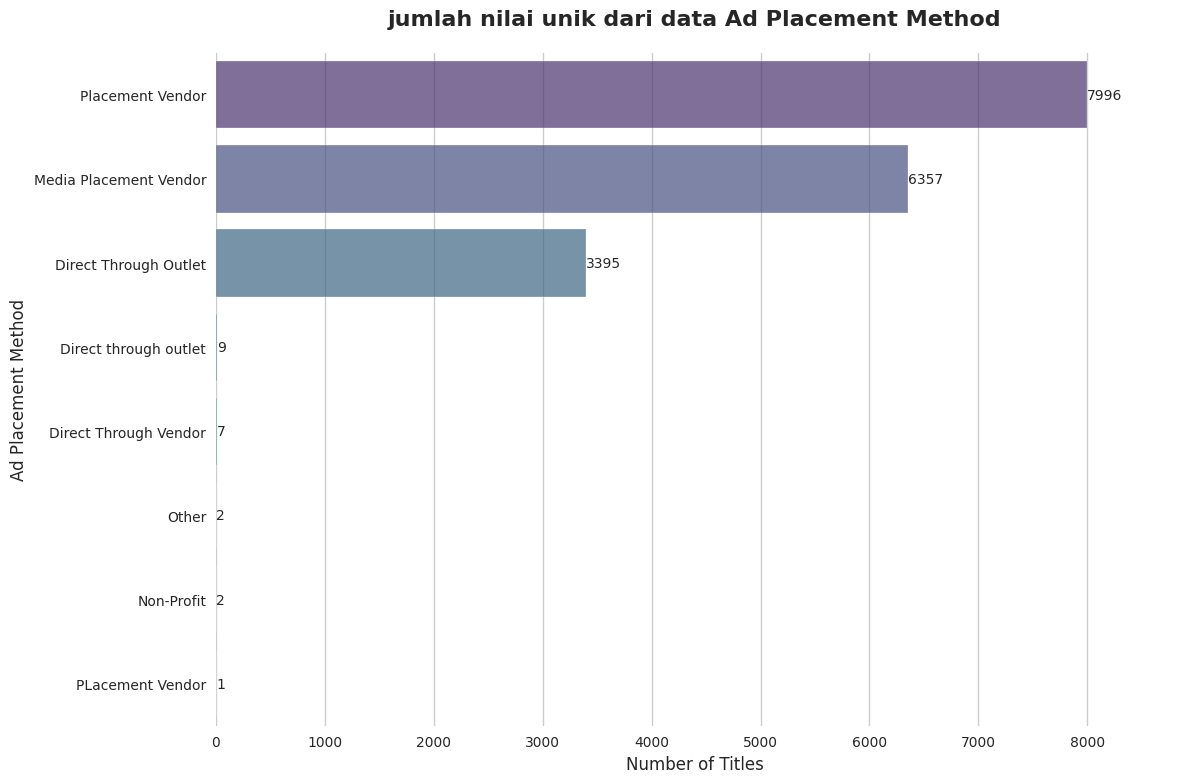

<ipython-input-11-35ec5bd161f2>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


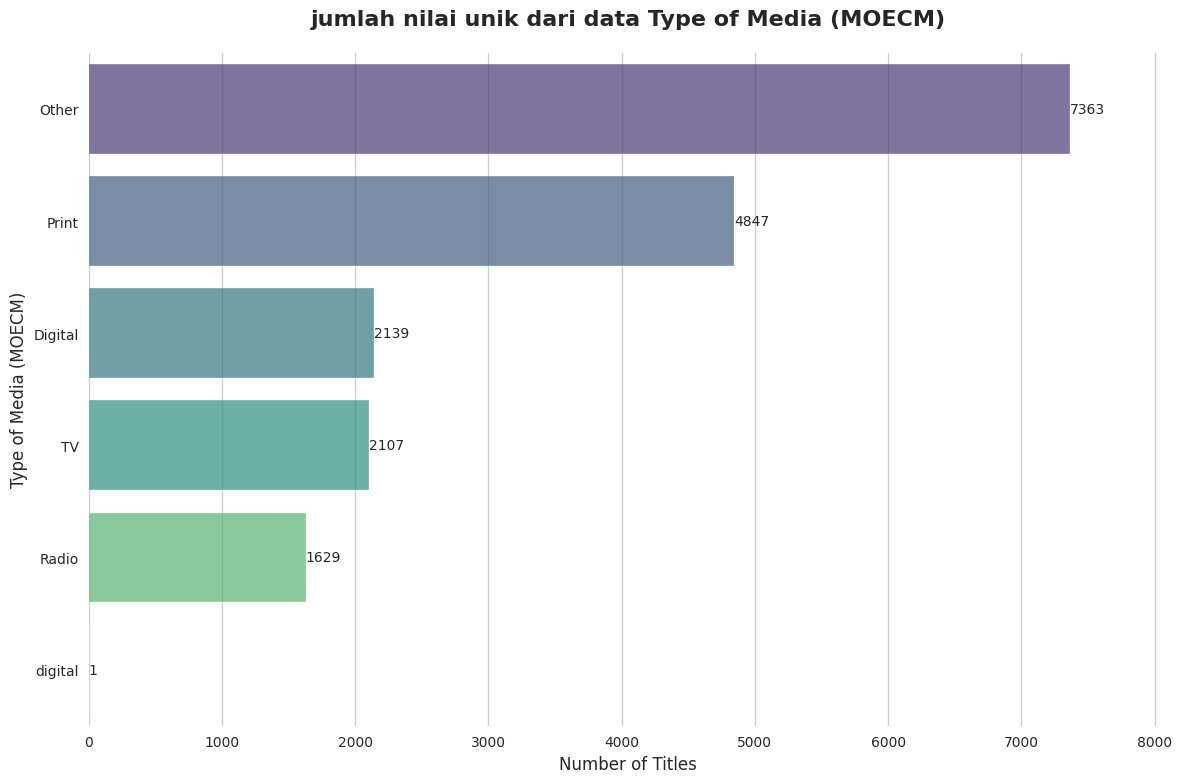

<ipython-input-11-35ec5bd161f2>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


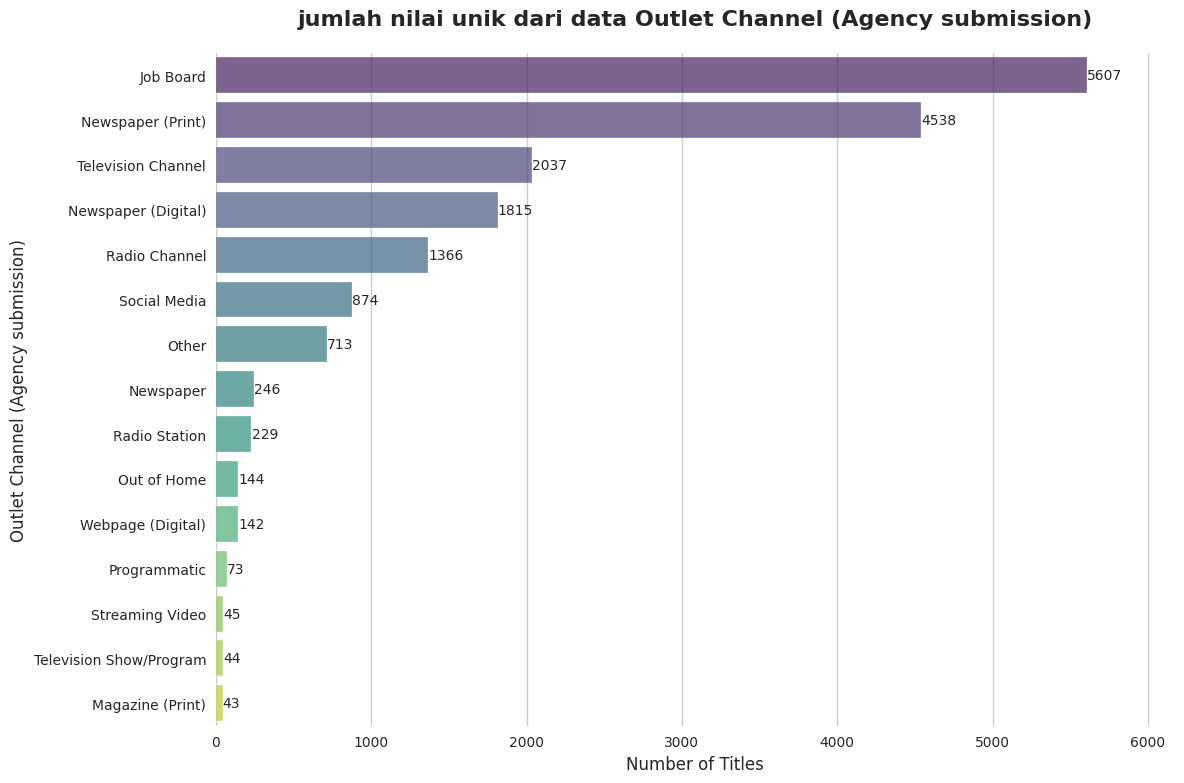

<ipython-input-11-35ec5bd161f2>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


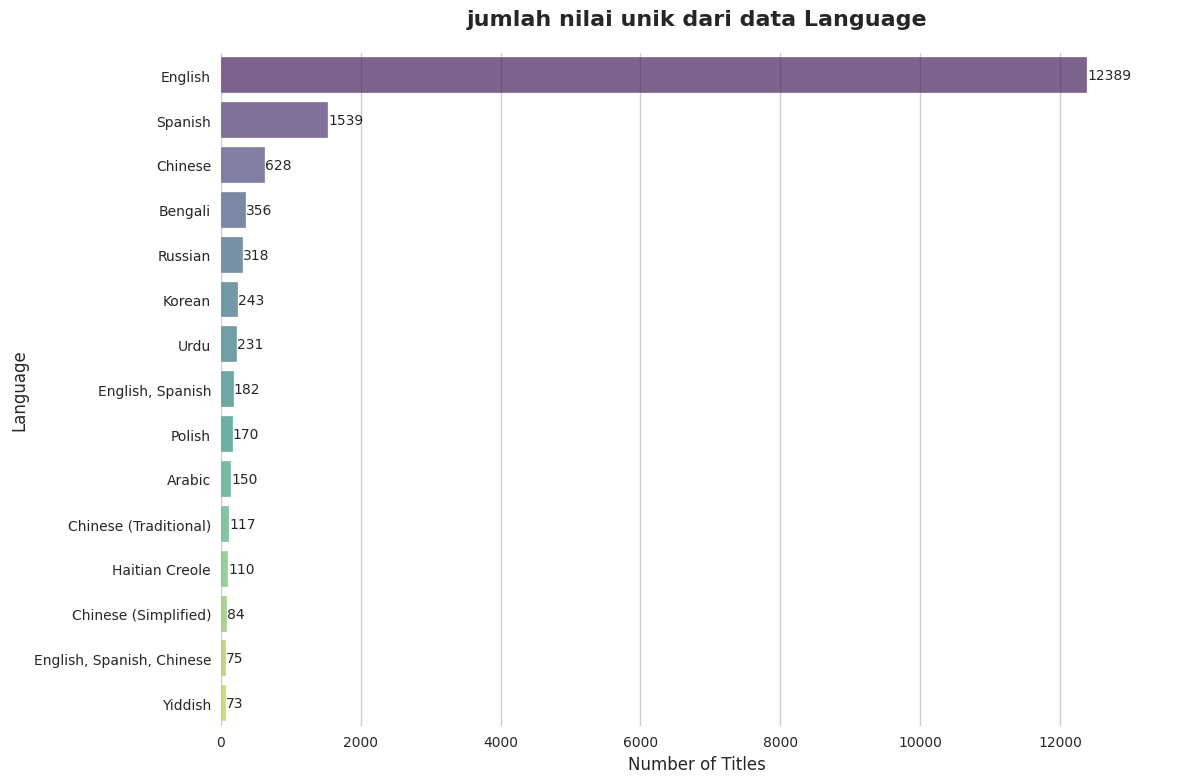

<ipython-input-11-35ec5bd161f2>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


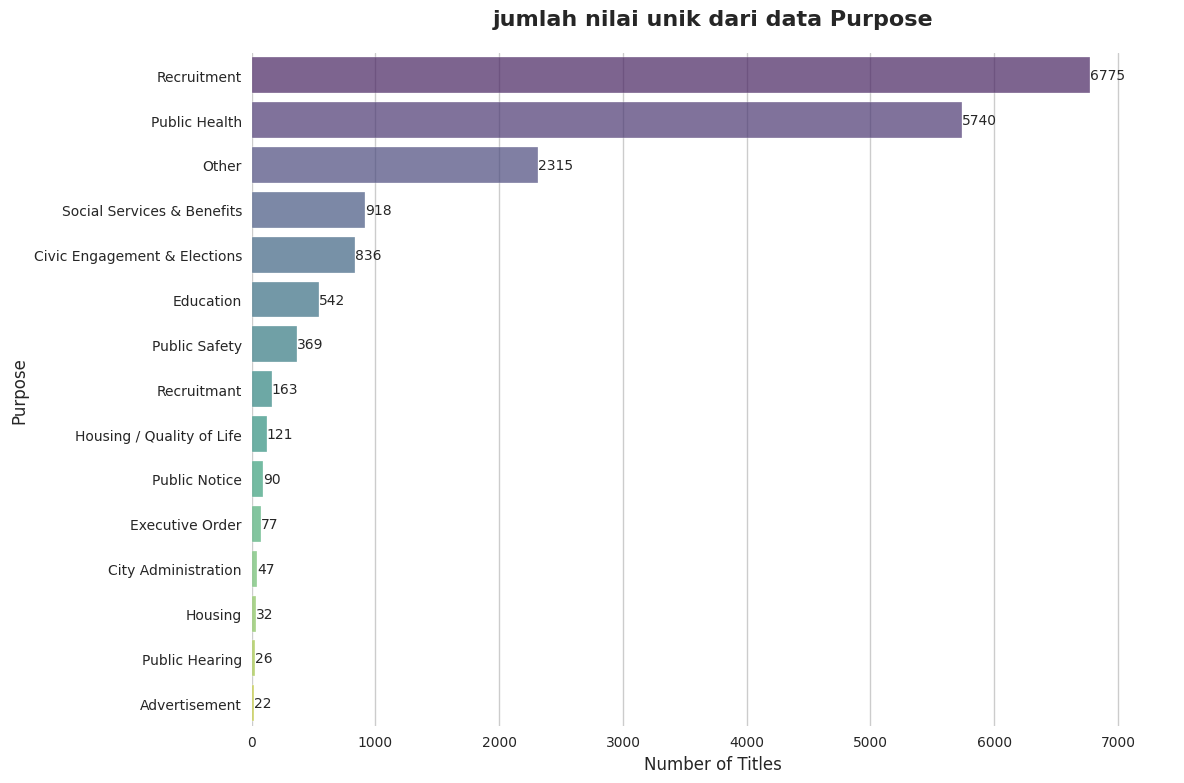

In [ ]:
visualisasi_kolom(df,'Ad Placement Method')
visualisasi_kolom(df,'Type of Media (MOECM)')
visualisasi_kolom(df,'Outlet Channel (Agency submission)')
visualisasi_kolom(df, 'Language')
# visualisasi_kolom(df,'Agency')
visualisasi_kolom(df,'Purpose')


<ipython-input-13-fe5b39faf6dd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_counts.index.astype(str), y=top_10_counts.values, palette='viridis')


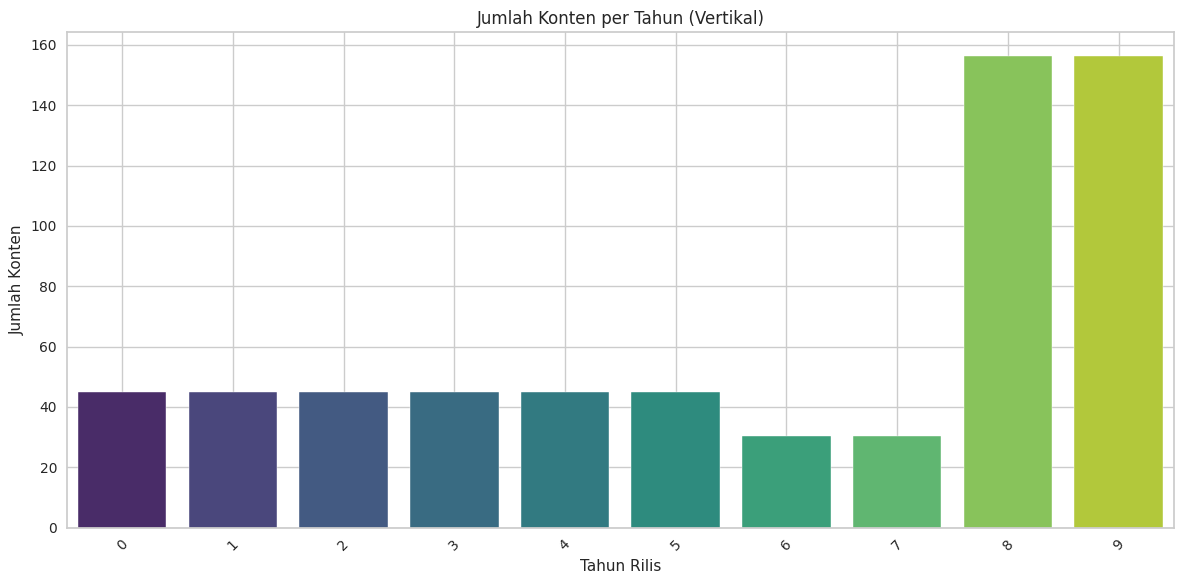

In [ ]:
Spend_Amount_counts = df['Spend Amount']

# Get top 10 largest values
top_10_counts = Spend_Amount_counts.head(10)

plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.set_style("whitegrid")

# Change to bar plot using sns.barplot()
sns.barplot(x=top_10_counts.index.astype(str), y=top_10_counts.values, palette='viridis')

plt.title('Jumlah Konten per Tahun (Vertikal)')
plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah Konten')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add gridlines if desired (optional)
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

In [ ]:
df

,Spend Amount,Ad Placement Method,Type of Media (MOECM),Outlet Channel (Agency submission),Language,Purpose,Ad Campaign Name
0,44.78,Media Placement Vendor,Other,Job Board,English,Recruitment,RCU Agency Attorney
1,44.78,Media Placement Vendor,Other,Job Board,English,Recruitment,RCU Agency Attorney
2,44.78,Media Placement Vendor,Other,Job Board,English,Recruitment,RCU Agency Attorney
3,44.78,Media Placement Vendor,Other,Job Board,English,Recruitment,RCU Agency Attorney
4,44.78,Media Placement Vendor,Other,Job Board,English,Recruitment,RCU Agency Attorney
...,...,...,...,...,...,...,...
18081,1000.00,Placement Vendor,Digital,Newspaper (Digital),Urdu,Other,International Mobie
18082,785.00,Placement Vendor,Print,Newspaper (Print),Urdu,Other,Shop Your City
18083,785.00,Placement Vendor,Print,Newspaper (Print),Urdu,Other,Small Business Opportunities
18084,785.00,Placement Vendor,Print,Newspaper (Print),Urdu,Other,Workforce1 Career Centers


BISA DI LIHAT BAHWA DATA YANG ADA DALAM PROSES INI MEMILIKI KEMAMPUAN YANG AGAK CUKUP TERHAMBUR DENGAN KECENDERUNGAN YANG LEBIH BANYAK KE ARAH DATA IMBALANCE

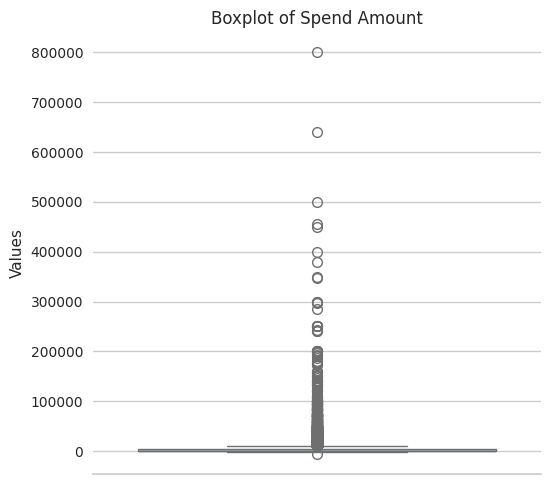

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
def boxplot_numeric(df, numeric_cols):
  n_cols = 3
  n_rows = len(numeric_cols) // n_cols + 1

  plt.figure(figsize=(15, 5*n_rows))

  for i, col in enumerate(numeric_cols, 1):
      if not df[col].isna().all():
          plt.subplot(n_rows, n_cols, i)
          sns.boxplot(y=df[col], color='skyblue')
          plt.title(f'Boxplot of {col}', fontsize=12)
          plt.ylabel('Values')
          sns.despine(left=True)

  plt.tight_layout()
  plt.show()

boxplot_numeric(df, numeric_cols)

BISA DI LIHAT BAHWA MASIH BANYAK MASALAH DATA BAIK ITU DARI DATA YANG DOUBEL DAN OUTLAYER MAKA AKAN DILAKUKAN PEMBERSIHAN LEBIH LANJUT

**FOKUS PADA CLENAING DATA**

In [ ]:
columns_to_keep = [
    'Spend Amount',
    'Ad Placement Method',
    'Type of Media (MOECM)',
    'Outlet Channel (Agency submission)',
    'Language',
    # 'Agency',
    'Purpose',
    # 'Ad Campaign Name'
    # 'Vendor Name'
]

BISA DILIHAT SEBELUMNYA BAHWA DATA LAIN SEPERTI VENDOR NAME, DAN BEBERAPA DATA TIDAK RELEVAN BAHKAN CENDERUNG MENGGANGGU SEHINGGA SAYA MEMUTUSKAN UNTUK MENYIMPAN VARIABEL DI ATAS KARENA DI NILAI LEBIH BERPENGARUH PADA PENETUAN PERFORMA IKLAN

In [ ]:
for i in columns_to_keep:
    num_null_nan = df[i].isnull().sum()
    jumlah = df[i].value_counts()
    nama_terbanyak = str(jumlah.idxmax())  # pastikan string
    print(type(nama_terbanyak))  # cek tipe
    df[i].fillna(value=nama_terbanyak, inplace=True)
    print(f"There are {num_null_nan} null/NaN values in the {i} column.")
    print(f"The most common value in the {i} column is {nama_terbanyak}.")


<class 'str'>
There are 15 null/NaN values in the Spend Amount column.
The most common value in the Spend Amount column is 2.13.
<class 'str'>
There are 317 null/NaN values in the Ad Placement Method column.
The most common value in the Ad Placement Method column is Placement Vendor.
<class 'str'>
There are 0 null/NaN values in the Type of Media (MOECM) column.
The most common value in the Type of Media (MOECM) column is Other.
<class 'str'>
There are 0 null/NaN values in the Outlet Channel (Agency submission) column.
The most common value in the Outlet Channel (Agency submission) column is Job Board.
<class 'str'>
There are 896 null/NaN values in the Language column.
The most common value in the Language column is English.
<class 'str'>
There are 1 null/NaN values in the Purpose column.
The most common value in the Purpose column is Recruitment.


<ipython-input-17-2f2b6b936877>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(value=nama_terbanyak, inplace=True)
<ipython-input-17-2f2b6b936877>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.13' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[i].fillna(value=nama_terbanyak, inplace=True)
<ipython-input-17-2f2b6b936877>:6: SettingWithCopyWarning: 
A value is trying to be set on a

In [ ]:
for i in columns_to_keep :
  num_null_nan = df[i].isnull().sum()
  print(f"There are {num_null_nan} null/NaN values in the {i} column.")

There are 0 null/NaN values in the Spend Amount column.
There are 0 null/NaN values in the Ad Placement Method column.
There are 0 null/NaN values in the Type of Media (MOECM) column.
There are 0 null/NaN values in the Outlet Channel (Agency submission) column.
There are 0 null/NaN values in the Language column.
There are 0 null/NaN values in the Purpose column.


ADA BEBERAPA DATA NAN YANG ADA TADI SEKARANG SUDAH DI HAPUS

In [ ]:
df

,Spend Amount,Ad Placement Method,Type of Media (MOECM),Outlet Channel (Agency submission),Language,Purpose,Ad Campaign Name
0,44.78,Media Placement Vendor,Other,Job Board,English,Recruitment,RCU Agency Attorney
1,44.78,Media Placement Vendor,Other,Job Board,English,Recruitment,RCU Agency Attorney
2,44.78,Media Placement Vendor,Other,Job Board,English,Recruitment,RCU Agency Attorney
3,44.78,Media Placement Vendor,Other,Job Board,English,Recruitment,RCU Agency Attorney
4,44.78,Media Placement Vendor,Other,Job Board,English,Recruitment,RCU Agency Attorney
...,...,...,...,...,...,...,...
18081,1000.0,Placement Vendor,Digital,Newspaper (Digital),Urdu,Other,International Mobie
18082,785.0,Placement Vendor,Print,Newspaper (Print),Urdu,Other,Shop Your City
18083,785.0,Placement Vendor,Print,Newspaper (Print),Urdu,Other,Small Business Opportunities
18084,785.0,Placement Vendor,Print,Newspaper (Print),Urdu,Other,Workforce1 Career Centers


In [ ]:
df["Spend Amount"] = pd.to_numeric(df["Spend Amount"], errors='coerce')

<ipython-input-20-4fc713b2542b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Spend Amount"] = pd.to_numeric(df["Spend Amount"], errors='coerce')


MENCOBA MENGILANKA OULAYER

In [ ]:
print(df["Spend Amount"].isnull().sum())

0


In [ ]:
Q1 = df["Spend Amount"].quantile(0.25)
Q3 = df["Spend Amount"].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[
    (df["Spend Amount"] >= lower_bound) &
    (df["Spend Amount"] <= upper_bound)
]

In [ ]:
from scipy.stats.mstats import winsorize
df["Spend Amount"] = winsorize(df["Spend Amount"], limits=[0.1, 0.1])

<ipython-input-24-163ccae9e6f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Spend Amount"] = winsorize(df["Spend Amount"], limits=[0.1, 0.1])


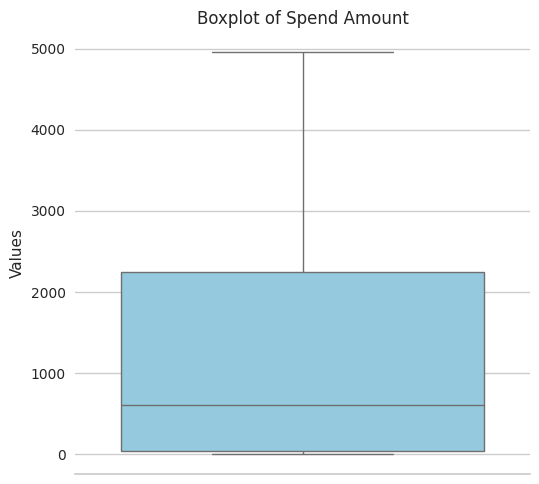

In [ ]:
boxplot_numeric(df, numeric_cols)

In [ ]:
df.dropna()

,Spend Amount,Ad Placement Method,Type of Media (MOECM),Outlet Channel (Agency submission),Language,Purpose,Ad Campaign Name
0,44.78,Media Placement Vendor,Other,Job Board,English,Recruitment,RCU Agency Attorney
1,44.78,Media Placement Vendor,Other,Job Board,English,Recruitment,RCU Agency Attorney
2,44.78,Media Placement Vendor,Other,Job Board,English,Recruitment,RCU Agency Attorney
3,44.78,Media Placement Vendor,Other,Job Board,English,Recruitment,RCU Agency Attorney
4,44.78,Media Placement Vendor,Other,Job Board,English,Recruitment,RCU Agency Attorney
...,...,...,...,...,...,...,...
18081,1000.00,Placement Vendor,Digital,Newspaper (Digital),Urdu,Other,International Mobie
18082,785.00,Placement Vendor,Print,Newspaper (Print),Urdu,Other,Shop Your City
18083,785.00,Placement Vendor,Print,Newspaper (Print),Urdu,Other,Small Business Opportunities
18084,785.00,Placement Vendor,Print,Newspaper (Print),Urdu,Other,Workforce1 Career Centers


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15892 entries, 0 to 18085
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Spend Amount                        15892 non-null  float64
 1   Ad Placement Method                 15892 non-null  object 
 2   Type of Media (MOECM)               15892 non-null  object 
 3   Outlet Channel (Agency submission)  15892 non-null  object 
 4   Language                            15892 non-null  object 
 5   Purpose                             15892 non-null  object 
 6   Ad Campaign Name                    15889 non-null  object 
dtypes: float64(1), object(6)
memory usage: 993.2+ KB


In [ ]:
for i in columns_to_keep :
  num_null_nan = df[i].isnull().sum()
  print(f"There are {num_null_nan} null/NaN values in the {i} column.")

There are 0 null/NaN values in the Spend Amount column.
There are 0 null/NaN values in the Ad Placement Method column.
There are 0 null/NaN values in the Type of Media (MOECM) column.
There are 0 null/NaN values in the Outlet Channel (Agency submission) column.
There are 0 null/NaN values in the Language column.
There are 0 null/NaN values in the Purpose column.


In [ ]:
df_final = df.drop(columns=['Ad Campaign Name'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [ ]:
numeric_cols = df_final.select_dtypes(include=['number']).columns

scaler = MinMaxScaler()
df_final[numeric_cols] = scaler.fit_transform(df_final[numeric_cols])
df_final.head()

,Spend Amount,Ad Placement Method,Type of Media (MOECM),Outlet Channel (Agency submission),Language,Purpose
0,0.008543,Media Placement Vendor,Other,Job Board,English,Recruitment
1,0.008543,Media Placement Vendor,Other,Job Board,English,Recruitment
2,0.008543,Media Placement Vendor,Other,Job Board,English,Recruitment
3,0.008543,Media Placement Vendor,Other,Job Board,English,Recruitment
4,0.008543,Media Placement Vendor,Other,Job Board,English,Recruitment


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15892 entries, 0 to 18085
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Spend Amount                        15892 non-null  float64
 1   Ad Placement Method                 15892 non-null  object 
 2   Type of Media (MOECM)               15892 non-null  object 
 3   Outlet Channel (Agency submission)  15892 non-null  object 
 4   Language                            15892 non-null  object 
 5   Purpose                             15892 non-null  object 
dtypes: float64(1), object(5)
memory usage: 869.1+ KB


In [ ]:
categorical_list = [
    "Ad Placement Method",
    "Type of Media (MOECM)",
    "Outlet Channel (Agency submission)",
    "Language",
    # "Agency",
    "Purpose"
]

In [ ]:
for column in categorical_list:
    df_final[column] = df_final[column].astype(str)

In [ ]:
df_final

,Spend Amount,Ad Placement Method,Type of Media (MOECM),Outlet Channel (Agency submission),Language,Purpose
0,0.008543,Media Placement Vendor,Other,Job Board,English,Recruitment
1,0.008543,Media Placement Vendor,Other,Job Board,English,Recruitment
2,0.008543,Media Placement Vendor,Other,Job Board,English,Recruitment
3,0.008543,Media Placement Vendor,Other,Job Board,English,Recruitment
4,0.008543,Media Placement Vendor,Other,Job Board,English,Recruitment
...,...,...,...,...,...,...
18081,0.201379,Placement Vendor,Digital,Newspaper (Digital),Urdu,Other
18082,0.157976,Placement Vendor,Print,Newspaper (Print),Urdu,Other
18083,0.157976,Placement Vendor,Print,Newspaper (Print),Urdu,Other
18084,0.157976,Placement Vendor,Print,Newspaper (Print),Urdu,Other


KEMBALI MELAKUKAN ENCODING UNTUK DATA KATEGORIKAL

In [ ]:
categorical_columns = [
    "Ad Placement Method",
    "Type of Media (MOECM)",
    "Outlet Channel (Agency submission)",
    "Language",
    # "Agency",
    "Purpose"
    # "Ad Campaign Name"
    # "Vendor Name"
]

In [ ]:
label_encoder = LabelEncoder()
df_final = pd.DataFrame(df)
df_final.drop(columns=['Ad Campaign Name'], inplace=True)
for col in categorical_columns:
    df_final[col] = label_encoder.fit_transform(df[col])

In [ ]:
df_final

,Spend Amount,Ad Placement Method,Type of Media (MOECM),Outlet Channel (Agency submission),Language,Purpose
0,44.78,1,1,4,16,15
1,44.78,1,1,4,16,15
2,44.78,1,1,4,16,15
3,44.78,1,1,4,16,15
4,44.78,1,1,4,16,15
...,...,...,...,...,...,...
18081,1000.00,5,0,11,91,9
18082,785.00,5,2,12,91,9
18083,785.00,5,2,12,91,9
18084,785.00,5,2,12,91,9


** PROSES CLUSTERING**

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [ ]:
k = 3
hc = AgglomerativeClustering(n_clusters=k, linkage='ward')

df_final["Cluster"] = hc.fit_predict(df_final)

**evalusasi**

In [ ]:
f_numeric = df_final.select_dtypes(include=[np.number]).drop(columns=["Cluster"]).to_numpy()

silhouette_avg = silhouette_score(df_final[numeric_cols], df_final["Cluster"])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6980523885281856


**distribusi score elbow**

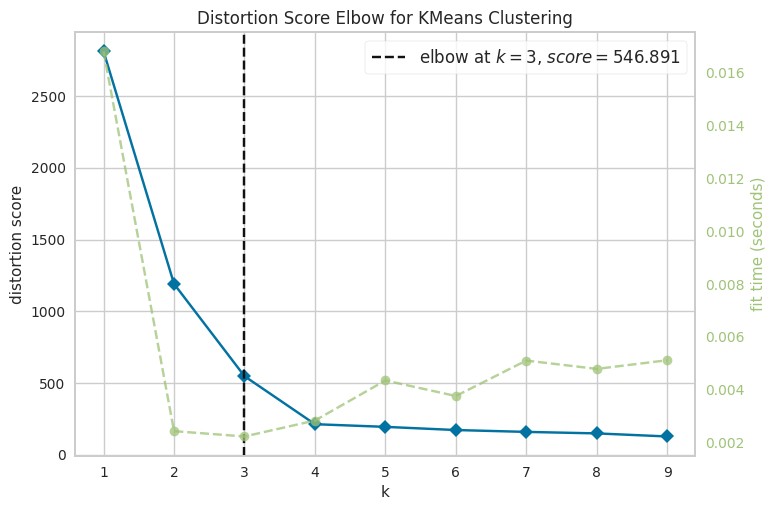

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X)
visualizer.show()

**fisualisasi**

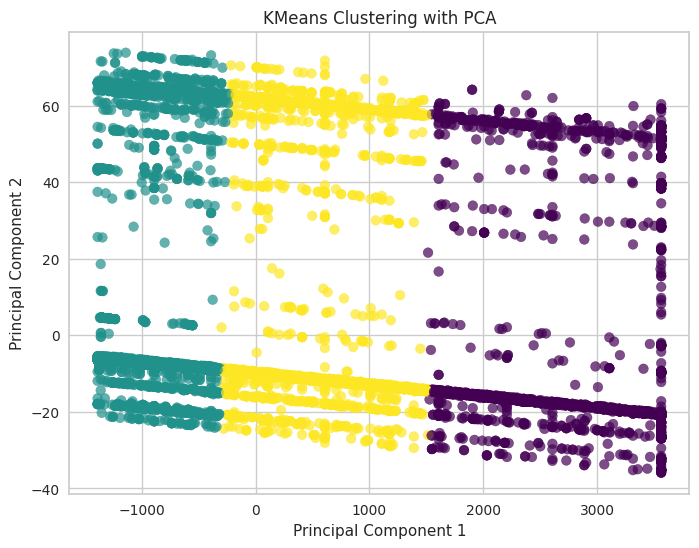

In [ ]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_final.drop(columns=['Cluster']))

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_final['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering with PCA')
plt.show()

data cukup merata secara hasil clustering namun ada beberapa kekurangan seperti cluster 2 emakan lebih dari 40 persen data cenderung menyebabkan imbalancing data

**melihat karakteristrik clustering**

kembalikan semua data yang sudah di encoding

In [ ]:
df_final['Cluster'] = hc.labels_

In [ ]:
df_final

,Spend Amount,Ad Placement Method,Type of Media (MOECM),Outlet Channel (Agency submission),Language,Purpose,Cluster
0,44.78,1,1,4,16,15,1
1,44.78,1,1,4,16,15,1
2,44.78,1,1,4,16,15,1
3,44.78,1,1,4,16,15,1
4,44.78,1,1,4,16,15,1
...,...,...,...,...,...,...,...
18081,1000.00,5,0,11,91,9,1
18082,785.00,5,2,12,91,9,1
18083,785.00,5,2,12,91,9,1
18084,785.00,5,2,12,91,9,1


In [ ]:
for col in categorical_columns:
  try:
    df_final[col] = label_encoder.inverse_transform(df_final[col])
  except:
    continue

**gabung dengan df sebelumnya**

In [ ]:
df = df.merge(df_final[["Cluster"]], left_index=True, right_index=True, how="left")

In [ ]:
df

,Spend Amount,Ad Placement Method,Type of Media (MOECM),Outlet Channel (Agency submission),Language,Purpose,Ad Campaign Name,Cluster
0,44.78,Media Placement Vendor,Other,Job Board,English,Recruitment,RCU Agency Attorney,1
1,44.78,Media Placement Vendor,Other,Job Board,English,Recruitment,RCU Agency Attorney,1
2,44.78,Media Placement Vendor,Other,Job Board,English,Recruitment,RCU Agency Attorney,1
3,44.78,Media Placement Vendor,Other,Job Board,English,Recruitment,RCU Agency Attorney,1
4,44.78,Media Placement Vendor,Other,Job Board,English,Recruitment,RCU Agency Attorney,1
...,...,...,...,...,...,...,...,...
18081,1000.00,Placement Vendor,Digital,Newspaper (Digital),Urdu,Other,International Mobie,1
18082,785.00,Placement Vendor,Print,Newspaper (Print),Urdu,Other,Shop Your City,1
18083,785.00,Placement Vendor,Print,Newspaper (Print),Urdu,Other,Small Business Opportunities,1
18084,785.00,Placement Vendor,Print,Newspaper (Print),Urdu,Other,Workforce1 Career Centers,1


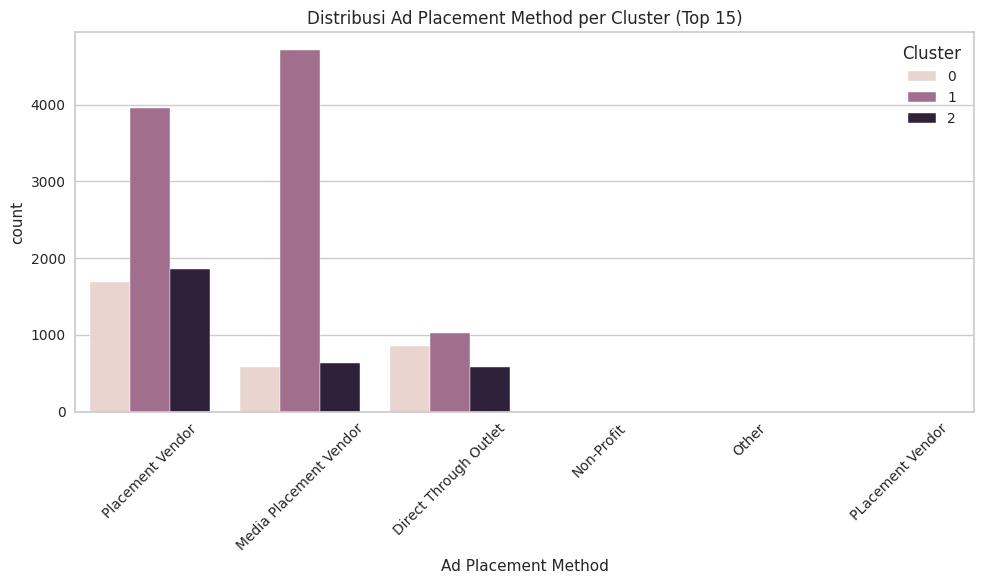

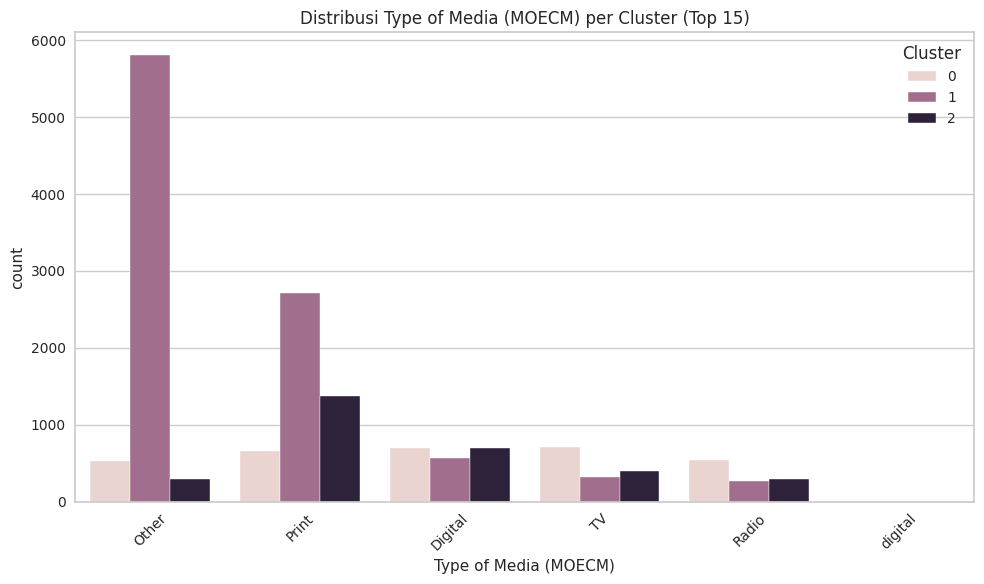

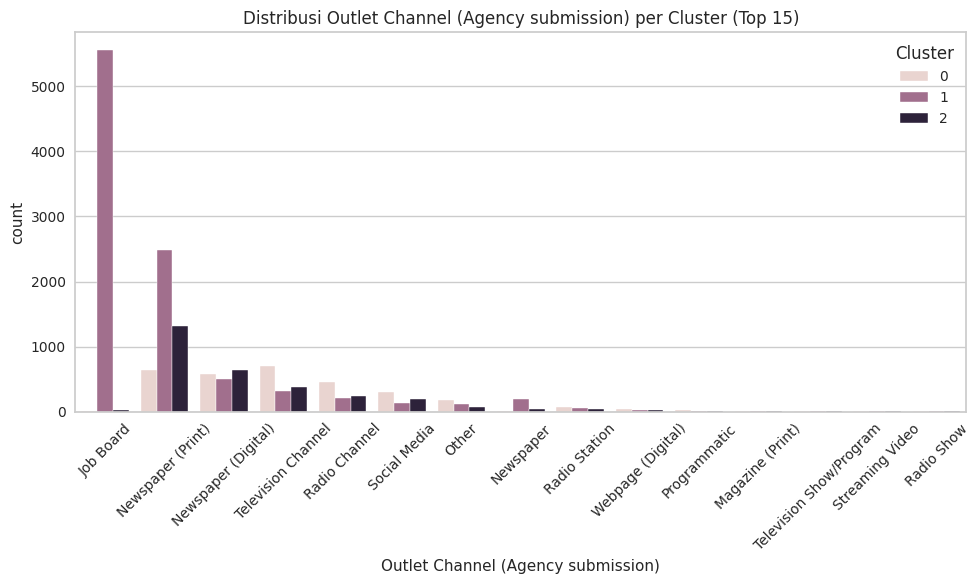

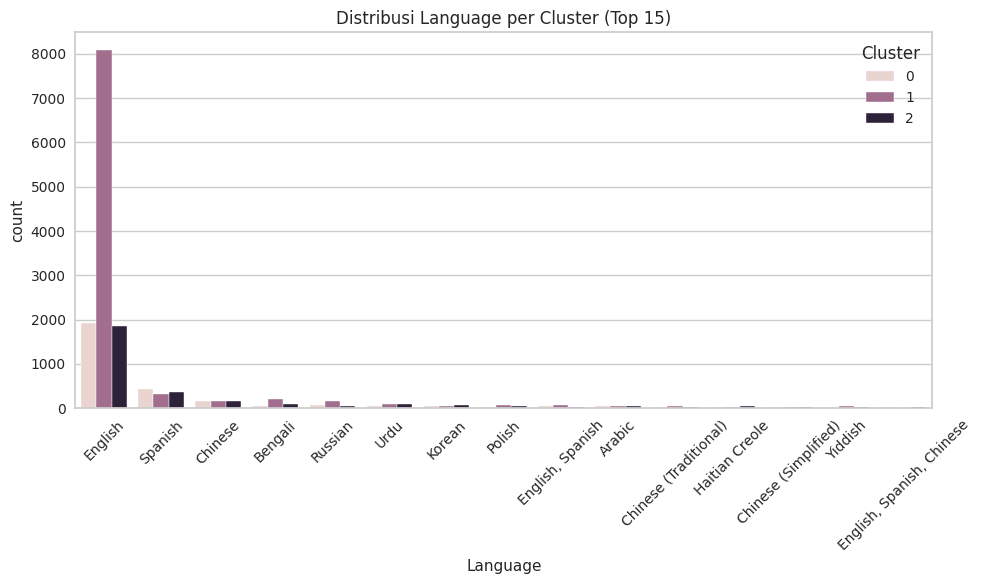

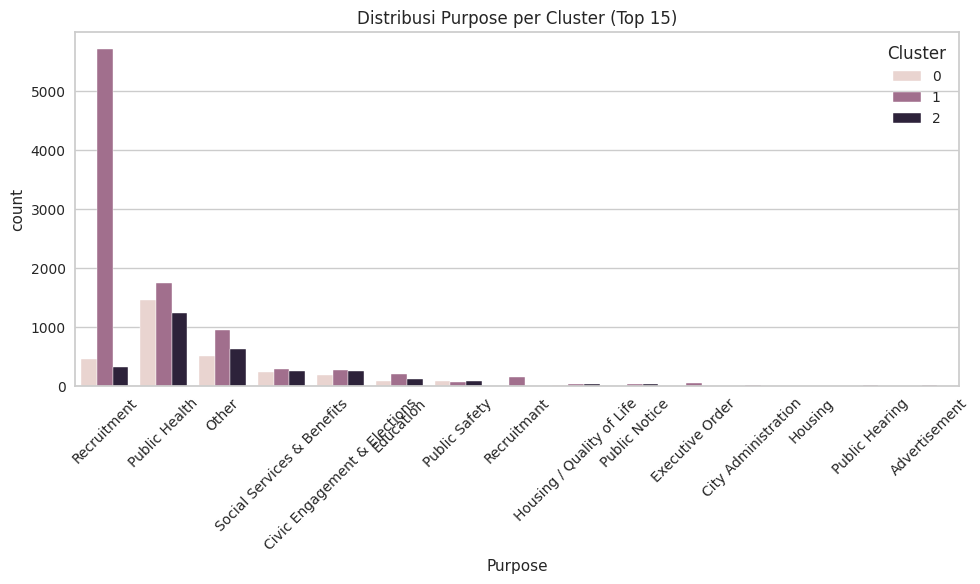

In [ ]:
for col in categorical_columns:
    plt.figure(figsize=(10, 6))

    top_15 = df[col].value_counts().nlargest(15).index

    filtered_df = df[df[col].isin(top_15)]


    sns.countplot(data=filtered_df, x=col, hue='Cluster', order=top_15)
    plt.title(f'Distribusi {col} per Cluster (Top 15)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15892 entries, 0 to 18085
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Spend Amount                        15892 non-null  float64
 1   Ad Placement Method                 15892 non-null  object 
 2   Type of Media (MOECM)               15892 non-null  object 
 3   Outlet Channel (Agency submission)  15892 non-null  object 
 4   Language                            15892 non-null  object 
 5   Purpose                             15892 non-null  object 
 6   Ad Campaign Name                    15889 non-null  object 
 7   Cluster                             15892 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 1.1+ MB


In [ ]:
for cluster in sorted(df['Cluster'].unique()):
    print(f"\nCluster {cluster} - Statistik Deskriptif:")
    cluster_data = df[df['Cluster'] == cluster].select_dtypes(include=['number'])
    print(cluster_data.describe())

    # Anda juga bisa menambahkan analisis tambahan seperti:
    print(f"\nUkuran Cluster {cluster}: {len(cluster_data)}")
    print(f"Proporsi: {len(cluster_data)/len(df):.2%}")


Cluster 0 - Statistik Deskriptif:
       Spend Amount  Cluster
count   3142.000000   3142.0
mean    4398.501996      0.0
std      699.389810      0.0
min     2907.000000      0.0
25%     3799.000000      0.0
50%     4956.000000      0.0
75%     4956.000000      0.0
max     4956.000000      0.0

Ukuran Cluster 0: 3142
Proporsi: 19.77%

Cluster 1 - Statistik Deskriptif:
       Spend Amount  Cluster
count   9679.000000   9679.0
mean     262.806921      1.0
std      319.769203      0.0
min        2.460000      1.0
25%        2.460000      1.0
50%       89.000000      1.0
75%      476.000000      1.0
max     1168.000000      1.0

Ukuran Cluster 1: 9679
Proporsi: 60.90%

Cluster 2 - Statistik Deskriptif:
       Spend Amount  Cluster
count   3071.000000   3071.0
mean    1873.401716      2.0
std      507.921252      0.0
min     1091.890000      2.0
25%     1448.000000      2.0
50%     1800.000000      2.0
75%     2300.000000      2.0
max     2907.000000      2.0

Ukuran Cluster 2: 3071
Propor


## 🧠 **Model Segmentasi Strategi Iklan Pemerintah NYC (Clustering-Based Framework)**

### 🔍 **1. Segmentasi Berdasarkan Budget (Hasil Clustering)**

| Cluster       | Ukuran (%) | Rata-rata Pengeluaran | Rentang Pengeluaran | Karakteristik Utama                                                          |
| ------------- | ---------- | --------------------- | ------------------- | ---------------------------------------------------------------------------- |
| **Cluster 0** | 24.79%     | \$4.028               | \$2.192 – \$4.956   | Kampanye prioritas tinggi dengan jangkauan luas dan media besar              |
| **Cluster 1** | **52.31%** | \$162                 | \$2 – \$871         | Kampanye kecil, masif, efisien (contoh: rekrutmen digital)                   |
| **Cluster 2** | 22.90%     | \$1.346               | \$573 – \$2.324     | Kampanye menengah, kombinasi skala & efisiensi, cocok untuk segmentasi lokal |

---

### 📊 **2. Analisis Tematik Berdasarkan Kampanye**

| Cluster       | Contoh Kampanye Dominan                    | Tema/Kategori                           | Media Kemungkinan            |
| ------------- | ------------------------------------------ | --------------------------------------- | ---------------------------- |
| **Cluster 0** | CVD Vaccination - SOL Bullseye, Fair Fares | Kesehatan, Transportasi, Hukum          | TV, Cetak, Multibahasa       |
| **Cluster 1** | Recruitment                                | Perekrutan Pegawai & Partisipasi Publik | Digital, Sosial Media, Lokal |
| **Cluster 2** | Education, Public Health, Other            | Edukasi dan Sosialisasi Tersegmentasi   | Gabungan (TV + Sosial Media) |

---

### 💡 **3. Strategi Implementasi Berdasarkan Cluster**

| Tujuan Kampanye                                | Rekomendasi Cluster | Strategi Utama                                |
| ---------------------------------------------- | ------------------- | --------------------------------------------- |
| **Efisiensi Budget, Skala Lokal**              | Cluster 1           | Volume tinggi, biaya rendah, platform digital |
| **Cakupan Massal & Kepentingan Publik Tinggi** | Cluster 0           | Anggaran besar, saluran premium, multibahasa  |
| **Keseimbangan Dampak dan Efisiensi**          | Cluster 2           | Target audiens spesifik, channel kombinasi    |

---

### 🔮 **4. Rekomendasi Analitik Lanjutan**

| Analisis                                                                       | Tujuan                                           | Output yang Diharapkan                                          |
| ------------------------------------------------------------------------------ | ------------------------------------------------ | --------------------------------------------------------------- |
| 🎯 Analisis fitur kategorikal (`Media Type`, `Language`, `Agency`) per cluster | Mengungkap kombinasi fitur optimal               | Strategi media dan kanal berdasarkan budget                     |
| 🤖 Model klasifikasi supervised (contoh: Random Forest)                        | Prediksi cluster kampanye baru berdasarkan fitur | Otomatisasi penentuan strategi kampanye                         |
| 📈 Budget Optimization Scenario                                                | Simulasi cluster vs impact                       | Pilihan realistis untuk kampanye berdampak dengan biaya moderat |

---

### 🏁 **Kesimpulan Strategis**

* **Cluster 1 = Kampanye Efisien**
  Cocok untuk volume tinggi dan biaya rendah (rekrutmen, pengumuman lokal)

* **Cluster 0 = Kampanye Prioritas Nasional**
  Gunakan untuk kampanye besar dan berdampak luas

* **Cluster 2 = Kompromi Ideal**
  Direkomendasikan untuk kampanye berdampak sedang, dengan efisiensi anggaran optimal




**save dengan melakukan undersampel untuk melakukan membuat data latih**

In [ ]:
X = df.drop(columns=['Cluster'])  # Fitur-fitur
y = df['Cluster']                # Target (cluster)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

In [ ]:
df_resampled = pd.concat([pd.DataFrame(X_train_resampled, columns=X_train.columns), pd.Series(y_train_resampled, name='Cluster')], axis=1)

In [ ]:
df_final = pd.concat([df_resampled, pd.concat([X_test, y_test], axis=1)])


In [ ]:
df_final.to_csv('hasil_clutering_iklan.csv', index=False)